# Lab - Amostragem

Esta tarefa explora a amostragem do sinal contínuo, mudança da taxa de amostragem com decimação e o teorema de Nyquist.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *

a) Considerando um sinal senoidal de 100 Hz amostrado a uma taxa de 1000 A/s durante 0,2 s, construa o vetor a. Plote o sinal amostrado (plot) em função de n e seu espectro (stem) em função da frequencia digital w (rd) no eixo horizontal inferior e a frequencia equivalente em Hertz no eixo horizontal superior.

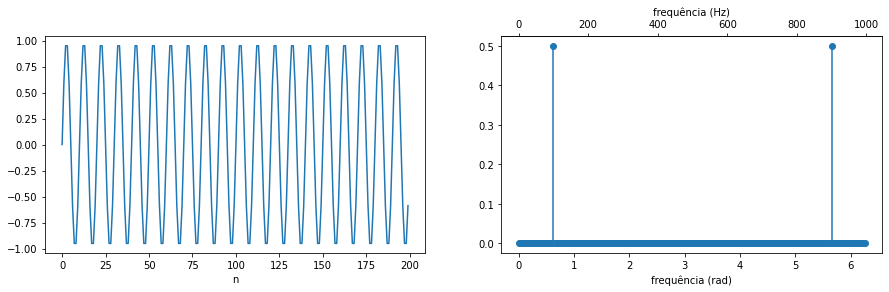

In [2]:
F=100; Fs=1000; T=0.2

N=Fs * T; n=arange(N)
a=sin(2*pi*(F/Fs)*n)

def plotas(x,Fs):
    X=fft(x)/N
    w=linspace(0,2*pi,num=len(X),endpoint=False)

    figure(figsize=(15,4))
    subplot(1,2,1)
    plot(x)
    xlabel('n')
    ax=subplot(1,2,2)
    stem(w,abs(X),linefmt='C0-',markerfmt='C0o',basefmt='C0-')

    def w2f(x):
       return x * Fs / (2*pi)
    def f2w(x):
       return x * 2*pi / Fs
    ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
    ax2.set_xlabel("frequência (Hz)")
    ax.set_xlabel("frequência (rad)")
    show()

    
plotas(a,Fs)

b) Construa o vetor b, considerando um sinal composto pela soma de três senoides: 60, 110, 160 Hz, com amplitudes 3, 2 e 1, amostrado a uma taxa de 1000 A/s durante 0,2 s. Plote o sinal amostrado (plot) e seu espectro (stem).


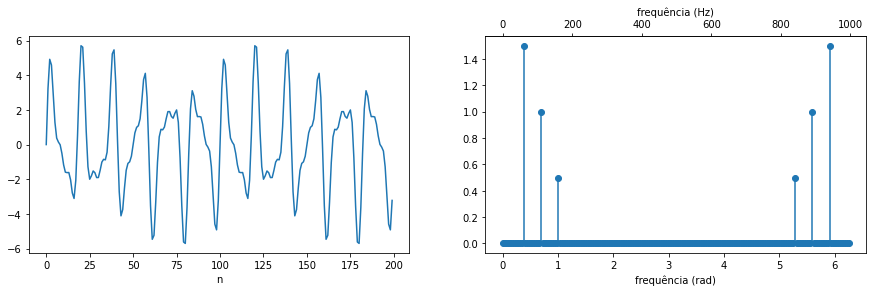

In [3]:
b = 3*sin(2*pi*(60/Fs)*n) + 2*sin(2*pi*(110/Fs)*n) + 1*sin(2*pi*(160/Fs)*n)

plotas(b, Fs)

c) Considere que o sinal do item (b) foi amostrado a 500 A/s. Ou seja, construa o vetor c a partir da decimação do vetor b, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


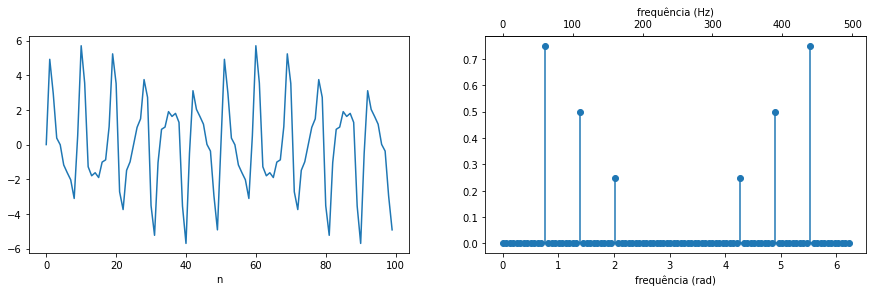

In [4]:
c = b[::2]
plotas(c, Fs/2)

d) Considere que o sinal do item (c) foi amostrado a 250 A/s. Ou seja,Construa o vetor d a partir da decimação do vetor c, jogando fora uma amostra para cada amostra. Plote o sinal amostrado (plot) e seu espectro (stem). 


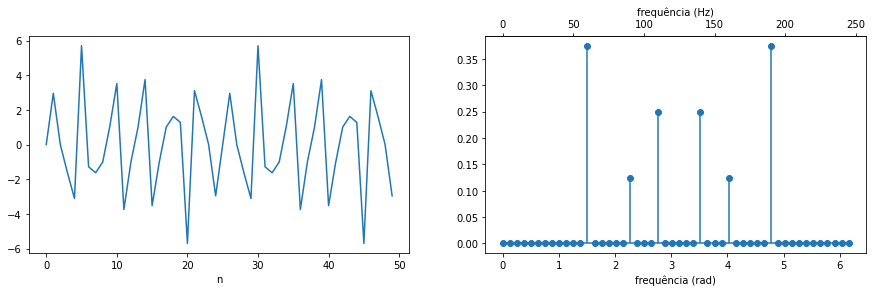

In [5]:
d = c[::2]
plotas(d, Fs/4)

e) Considerando que o período de amostragem $T_s = 1 / F_s, F_s = 1000$ A/s foi mantido na reprodução, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequência digital (rd) e da frequência em Hertz.


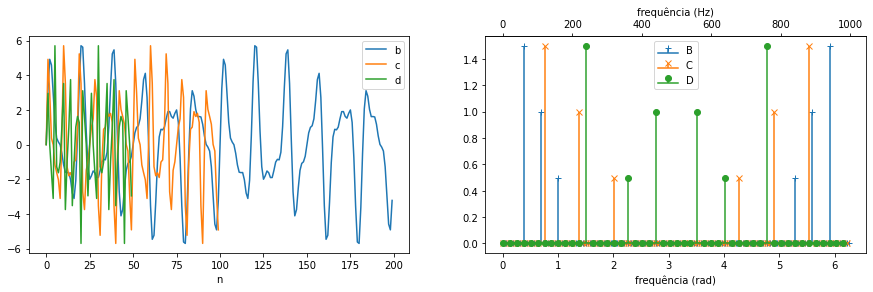

In [6]:
B=fft(b)/N
C=fft(c)/(N/2)
D=fft(d)/(N/4)

wb=linspace(0,2*pi,num=len(B),endpoint=False)
wc=linspace(0,2*pi,num=len(C),endpoint=False)
wd=linspace(0,2*pi,num=len(D),endpoint=False)

figure(figsize=(15,4))
subplot(1,2,1)
plot(b, label='b')
plot(c, label='c')
plot(d, label='d')
xlabel('n')
legend();
ax=subplot(1,2,2)
stem(wb,abs(B),linefmt='C0-',markerfmt='C0+',basefmt='C0-', label='B')
stem(wc,abs(C),linefmt='C1-',markerfmt='C1x',basefmt='C1-', label='C')
stem(wd,abs(D),linefmt='C2-',markerfmt='C2o',basefmt='C2-', label='D')
legend();
def w2f(x):
   return x * Fs / (2*pi)
def f2w(x):
   return x * 2*pi / Fs
ax2=ax.secondary_xaxis("top",functions=(w2f,f2w))
ax2.set_xlabel("frequência (Hz)")
ax.set_xlabel("frequência (rad)")
show()

f) Considerando que o período de amostragem na reprodução foi o mesmo período correspondente da amostragem, para não alterar as frequencias, $T_s = 1 / F_s, F_s = \{1000 , 500, 250 \}$ A/s, plote os três sinais (b,c,d) no mesmo eixo, em função da amostra n. Plote (stem) o spectro dos sinais em função da frequencia em Hertz, com a frequencia zero no centro, ou seja de -500 a +500 Hz. Dica: usar a função fftshift()

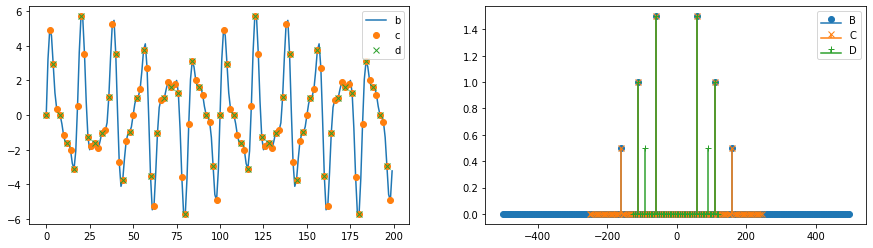

In [23]:
n = arange(int(N))

Bs=fftshift(fft(b))/N
Cs=fftshift(fft(c))/(N/2)
Ds=fftshift(fft(d))/(N/4)

wb=linspace(-500,500,num=len(Bs),endpoint=False)
wc=linspace(-250,250,num=len(Cs),endpoint=False)
wd=linspace(-125,125,num=len(Ds),endpoint=False)

figure(figsize=(15,4))
subplot(1,2,1)
plot(n, b, label='b')
plot(n[::2], c, label='c', marker='o', linestyle='None')
plot(n[::4], d, label='d', marker='x', linestyle='None')
legend();

subplot(1,2,2)
stem(wb,abs(Bs),linefmt='C0-',markerfmt='C0o',basefmt='C0-', label='B')
stem(wc, abs(Cs),linefmt='C1-',markerfmt='C1x',basefmt='C1-', label='C')
stem(wd, abs(Ds),linefmt='C2-',markerfmt='C2+',basefmt='C2-', label='D')
legend();

g) construa o vetor g, inserindo zeros entre as amostras do vetor c. Plote o sinal (plot) e seu espectro (stem). 

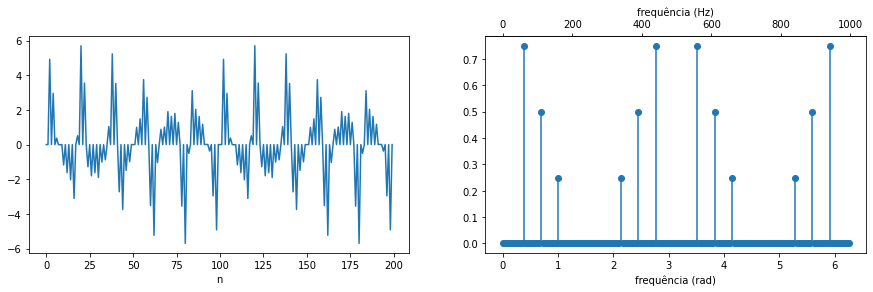

In [8]:
g = zeros(int(N))
g[::2] = c

plotas(g, Fs)

h) contrua o vetor h, inserindo três zeros entre as amostras do vetor d. Plote o sinal (plot) e seu espectro (stem). 

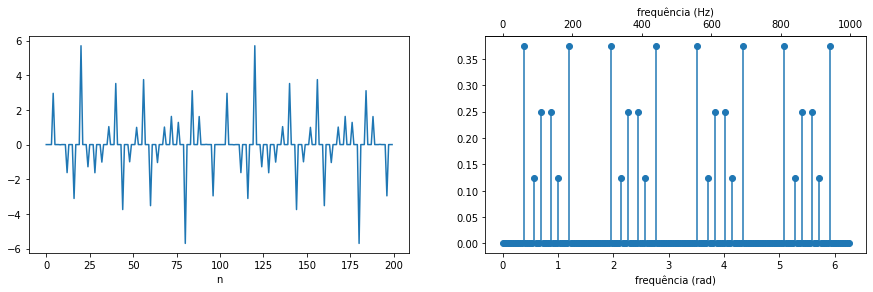

In [9]:
h = zeros(int(N))
h[::4] = d
plotas(h, Fs)

i) responda:
1) em que caso(s) aconteceu "aliasing" (c) e/ou (d) ?<br>
2) que senoide(s) sofreram "aliasing" 60, 110, ou 160 Hz ?<br>
3) qual a(s) frequencia(s) equivalente em Hertz após o "aliasing" ?<br>

1. Ocorreu aliasing em (d).
2. A senóide de 160 Hz sofreu aliasing.
3. A frequência equivalente após o aliasing é 90 Hz.